In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn import svm,linear_model
import pickle

In [2]:
#This is the data analysis or the EDA part

In [3]:
df = pd.read_csv('50_startups.csv')

In [4]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [8]:
'''
Understating different types of expenses:
1) RnD Spend - Rescearch and development spend is called RnD spend
The money spent on developing an new product and new technology is called rnd spend

2)Administrative spending - Thsi type of expense is occured in taking care of the bissnuess. This does not
invlove the cost that is put on for manufacturing

3)Merketing spends is to market the product
'''

'\nUnderstating different types of expenses:\n1) RnD Spend - Rescearch and development spend is called RnD spend\nThe money spent on developing an new product and new technology is called rnd spend\n\n2)Administrative spending - Thsi type of expense is occured in taking care of the bissnuess. This does not\ninvlove the cost that is put on for manufacturing\n\n3)Merketing spends is to market the product\n'

In [10]:
df.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [20]:
df.isnull().sum() #no null values

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [31]:
df['R&D Spend'].max()

165349.2

<BarContainer object of 3 artists>

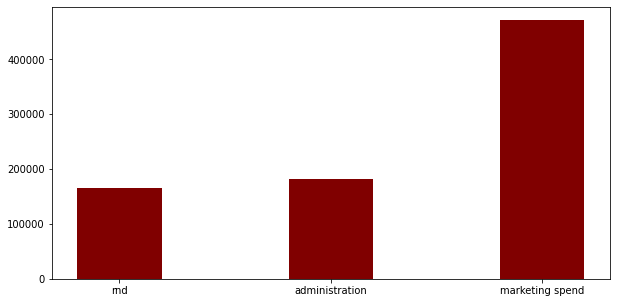

In [35]:
tot_rd = df['R&D Spend'].max()
tot_admin = df['Administration'].max()
tot_market = df['Marketing Spend'].max()
values = [tot_rd,tot_admin,tot_market]
lable = ['rnd','administration','marketing spend']
fig = plt.figure(figsize = (10, 5))
 
plt.bar(lable,values, color ='maroon',
        width = 0.4)

In [36]:
df['Profit'].max() #maximum profit is 192261.83

192261.83

In [37]:
df['Profit'].min() #minimum progit is 14k dollors

14681.4

In [38]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [39]:
upper_half_df = df[df['Profit'] > 112012.63] #selecting companies whoes profit is more than average

In [40]:
upper_half_df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [42]:
df.sort_values('Marketing Spend') #in the basis of marketing spend the top company is 0

,R&D Spend,Administration,Marketing Spend,Profit
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
19,86419.70,153514.11,0.00,122776.86
45,1000.23,124153.04,1903.93,64926.08
44,22177.74,154806.14,28334.72,65200.33
43,15505.73,127382.30,35534.17,69758.98
49,0.00,116983.80,45173.06,14681.40
32,63408.86,129219.61,46085.25,97427.84
31,61136.38,152701.92,88218.23,97483.56
30,61994.48,115641.28,91131.24,99937.59


In [45]:
df.sort_values(by=['R&D Spend'], ascending=False) #top company in rnd spend is company 0

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
6,134615.46,147198.87,127716.82,156122.51
5,131876.90,99814.71,362861.36,156991.12
7,130298.13,145530.06,323876.68,155752.60
9,123334.88,108679.17,304981.62,149759.96
8,120542.52,148718.95,311613.29,152211.77


In [46]:
df.sort_values(by=['Administration'], ascending=False) #top company in admin spend is company 28

,R&D Spend,Administration,Marketing Spend,Profit
28,66051.52,182645.56,118148.20,103282.38
34,46426.07,157693.92,210797.67,96712.80
14,119943.24,156547.42,256512.92,132602.65
44,22177.74,154806.14,28334.72,65200.33
21,78389.47,153773.43,299737.29,111313.02
19,86419.70,153514.11,0.00,122776.86
29,65605.48,153032.06,107138.38,101004.64
31,61136.38,152701.92,88218.23,97483.56
1,162597.70,151377.59,443898.53,191792.06
8,120542.52,148718.95,311613.29,152211.77


<AxesSubplot:>

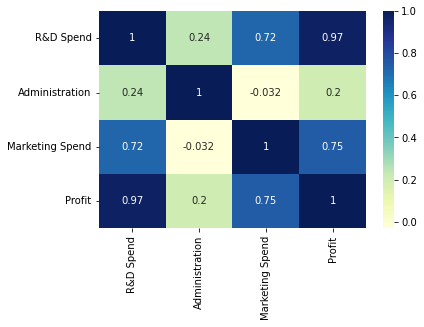

In [48]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#from the following heatmap it is clear that administration spend has small effect on profit of the company where as rnd spend yeilds more

In [49]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [134]:
profit_margins = {}

In [135]:
for ind in df.index:
    print("------------")
    print("company:",ind)
    print("rnd spend:",df['R&D Spend'][ind],'|', "administration spend:",df['Administration'][ind],'|',"marketing spend", df['Marketing Spend'][ind])
    prof_margin = ((df['R&D Spend'][ind]+df['Administration'][ind]+df['Marketing Spend'][ind]+df['Profit'][ind])-(df['R&D Spend'][ind]+df['Administration'][ind]+df['Marketing Spend'][ind]))/(df['R&D Spend'][ind]+df['Administration'][ind]+df['Marketing Spend'][ind]+df['Profit'][ind])*100
    print("profit margin:"
          ,prof_margin,"%"
         )
    profit_margins["company {0}".format(ind)] = prof_margin

------------
company: 0
rnd spend: 165349.2 | administration spend: 136897.8 | marketing spend 471784.1
profit margin: 19.896847429071013 %
------------
company: 1
rnd spend: 162597.7 | administration spend: 151377.59 | marketing spend 443898.53
profit margin: 20.19574084308473 %
------------
company: 2
rnd spend: 153441.51 | administration spend: 101145.55 | marketing spend 407934.54
profit margin: 22.38245774676838 %
------------
company: 3
rnd spend: 144372.41 | administration spend: 118671.85 | marketing spend 383199.62
profit margin: 22.059084730169374 %
------------
company: 4
rnd spend: 142107.34 | administration spend: 91391.77 | marketing spend 366168.42
profit margin: 21.699647846087718 %
------------
company: 5
rnd spend: 131876.9 | administration spend: 99814.71 | marketing spend 362861.36
profit margin: 20.889143044155933 %
------------
company: 6
rnd spend: 134615.46 | administration spend: 147198.87 | marketing spend 127716.82
profit margin: 27.600371223621178 %
--------

In [136]:
profit_margins

{'company 0': 19.896847429071013,
 'company 1': 20.19574084308473,
 'company 2': 22.38245774676838,
 'company 3': 22.059084730169374,
 'company 4': 21.699647846087718,
 'company 5': 20.889143044155933,
 'company 6': 27.600371223621178,
 'company 7': 20.61699118548659,
 'company 8': 20.76313828873653,
 'company 9': 21.806877651661914,
 'company 10': 24.859546373093846,
 'company 11': 24.59806230712028,
 'company 12': 23.11188689674846,
 'company 13': 21.85779494682597,
 'company 14': 19.922086666766926,
 'company 15': 20.659998958071142,
 'company 16': 21.48963621520039,
 'company 17': 19.356855587599178,
 'company 18': 19.879160102370232,
 'company 19': 33.84980651382546,
 'company 20': 19.50961636411021,
 'company 21': 17.305773306490398,
 'company 22': 18.07723209293779,
 'company 23': 18.530424739992224,
 'company 24': 25.514509032977145,
 'company 25': 23.88967172224205,
 'company 26': 23.023167023793604,
 'company 27': 15.954726621668486,
 'company 28': 21.96900731175868,
 'compan

In [138]:
max(profit_margins, key= lambda x: profit_margins[x])

'company 19'

In [139]:
profit_margins.keys()

dict_keys(['company 0', 'company 1', 'company 2', 'company 3', 'company 4', 'company 5', 'company 6', 'company 7', 'company 8', 'company 9', 'company 10', 'company 11', 'company 12', 'company 13', 'company 14', 'company 15', 'company 16', 'company 17', 'company 18', 'company 19', 'company 20', 'company 21', 'company 22', 'company 23', 'company 24', 'company 25', 'company 26', 'company 27', 'company 28', 'company 29', 'company 30', 'company 31', 'company 32', 'company 33', 'company 34', 'company 35', 'company 36', 'company 37', 'company 38', 'company 39', 'company 40', 'company 41', 'company 42', 'company 43', 'company 44', 'company 45', 'company 46', 'company 47', 'company 49'])

In [141]:
company_names = list(range(0,50))
p_margins = list(profit_margins.values())

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize = (25, 12.5))
addlabels(p_margins,company_names)
 
plt.bar(company_names,p_margins,
        width = 0.9)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50,) and arg 1 with shape (49,).

ValueError: Image size of 67009x32655 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x900 with 1 Axes>

In [142]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


<AxesSubplot:ylabel='R&D Spend'>

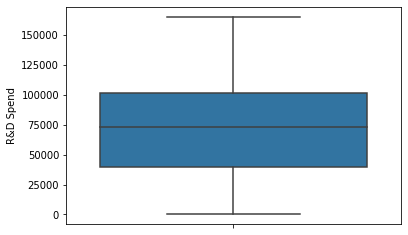

In [112]:
sns.boxplot(y=df['R&D Spend'])

<AxesSubplot:ylabel='Administration'>

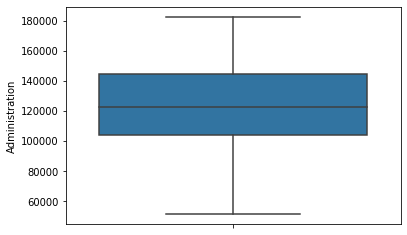

In [113]:
sns.boxplot(y=df['Administration'])

<AxesSubplot:ylabel='Marketing Spend'>

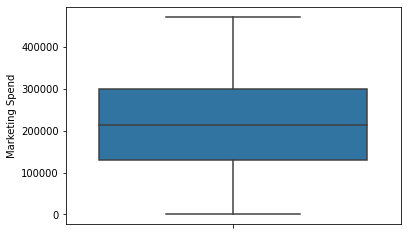

In [114]:
sns.boxplot(y=df['Marketing Spend'])

<AxesSubplot:>

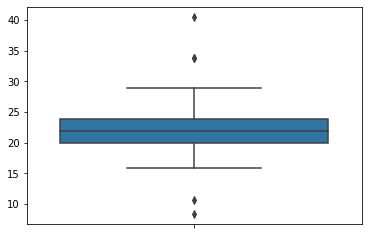

In [116]:
sns.boxplot(y=p_margins)

In [120]:
spent_total = {}

In [123]:
for ind in df.index:
    total_spent = (df['R&D Spend'][ind]+df['Administration'][ind]+df['Marketing Spend'][ind])
    spent_total["company {0}".format(ind)] = round(total_spent,2)

In [124]:
spent_total

{'company 0': 774031.1,
 'company 1': 757873.82,
 'company 2': 662521.6,
 'company 3': 646243.88,
 'company 4': 599667.53,
 'company 5': 594552.97,
 'company 6': 409531.15,
 'company 7': 599704.87,
 'company 8': 580874.76,
 'company 9': 536995.67,
 'company 10': 441668.14,
 'company 11': 442207.12,
 'company 12': 471023.57,
 'company 13': 480152.39,
 'company 14': 533003.58,
 'company 15': 498916.68,
 'company 16': 463956.72,
 'company 17': 522309.05,
 'company 18': 500844.52,
 'company 19': 239933.81,
 'company 20': 488785.63,
 'company 21': 531900.19,
 'company 22': 500096.57,
 'company 23': 478052.29,
 'company 24': 316900.16,
 'company 25': 342180.49,
 'company 26': 353514.92,
 'company 27': 553155.96,
 'company 28': 366845.28,
 'company 29': 325775.92,
 'company 30': 268767.0,
 'company 31': 302056.53,
 'company 32': 238713.72,
 'company 33': 373186.25,
 'company 34': 414917.66,
 'company 35': 336579.1,
 'company 36': 356846.79,
 'company 37': 292382.51,
 'company 38': 271442.62,


<BarContainer object of 50 artists>

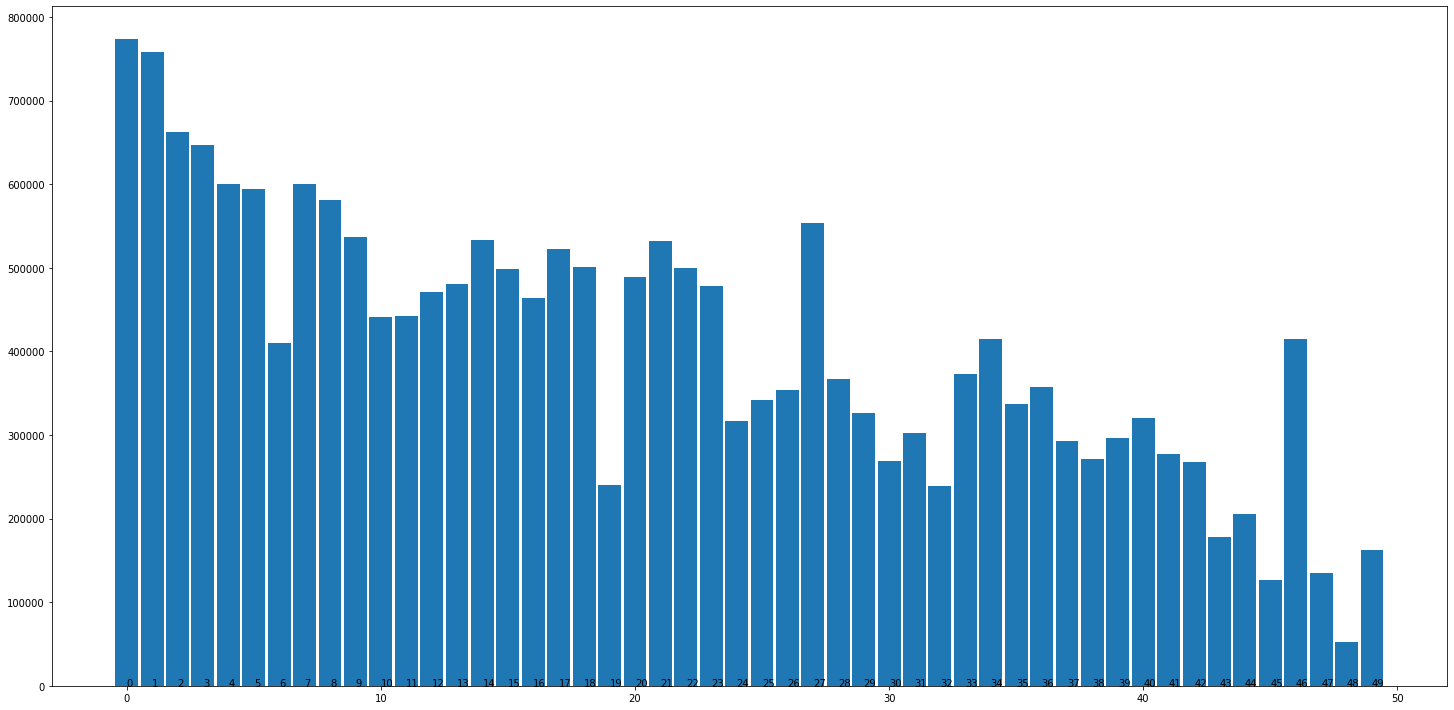

In [126]:
company_names = list(range(0,50))
spent = list(spent_total.values())

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize = (25, 12.5))
addlabels(spent,company_names)
 
plt.bar(company_names,spent,
        width = 0.9)

<AxesSubplot:>

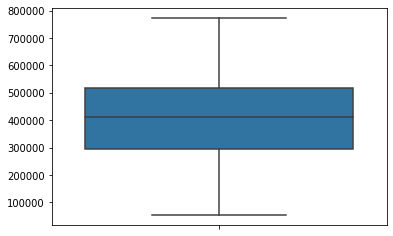

In [127]:
sns.boxplot(y=spent)

In [143]:
df.drop([47], axis=0, inplace=True)

In [144]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [145]:
#dropped 47 and 48 which seemed like an outlayer

In [146]:
###CREATING MACHINE LEARING MODELS###

In [241]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [242]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

In [171]:
##using xgboost##

In [221]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 20, seed = 200)

In [222]:
xgb_r.fit(train_X, train_y)

[18:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=200, reg_alpha=0, ...)

In [223]:
pred = xgb_r.predict(test_X)

In [224]:
pred

array([129811.48 , 124513.25 , 109205.31 ,  95978.46 , 127600.43 ,
        92438.79 ,  91598.24 , 134859.45 , 125228.36 , 154065.84 ,
       189450.22 , 152664.66 , 109894.945,  95394.836, 124329.82 ],
      dtype=float32)

In [250]:
xgb_r.score(test_X, test_y)

0.8772682077027021

In [251]:
pickle.dump(xgb_r, open('xgboost_startup.pkl', 'wb'))

In [228]:
##SVM##

In [249]:
'''
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(train_X, train_y)
    print(clf.score(test_X, test_y))
'''

'\nclassifiers = [\n    svm.SVR(),\n    linear_model.SGDRegressor(),\n    linear_model.BayesianRidge(),\n    linear_model.LassoLars(),\n    linear_model.ARDRegression(),\n    linear_model.PassiveAggressiveRegressor(),\n    linear_model.TheilSenRegressor(),\n    linear_model.LinearRegression()]\n\nfor item in classifiers:\n    print(item)\n    clf = item\n    clf.fit(train_X, train_y)\n    print(clf.score(test_X, test_y))\n'

In [252]:
#linear regression
lr = linear_model.LinearRegression()
lr.fit(train_X, train_y)
print(clf.score(test_X, test_y))
pickle.dump(lr, open('linear_startup.pkl', 'wb'))

0.9555144758692808


In [253]:
#svm
svm_r = svm.SVR()
svm_r.fit(train_X,train_y)
print(svm_r.score(test_X,test_y))


-0.40782283936702646


In [274]:
pickled_model = pickle.load(open('xgboost_startup.pkl', 'rb'))
pickled_model.predict(predxnp)

array([90048.266], dtype=float32)

In [275]:
pickled_model = pickle.load(open('linear_startup.pkl', 'rb'))
pickled_model.predict(predxnp)

C:\Users\Arjun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88123.83519184])

In [273]:
predx = [45564,56647,9840]
predxnp = np.array(predx)
predxnp = predxnp.reshape(1,-1)